In [1]:
from urllib import request
from bs4 import BeautifulSoup
import rioxarray as rio

with open('API_key.txt') as f:
    api_key = f.read()
    
ID = "TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND"

ressource = "arpege/1.0/wms/MF-NWP-GLOBAL-ARPEGE-01-EUROPE-WMS/GetCapabilities?service=WMS"

url = f"https://public-api.meteofrance.fr/public/{ressource}&apikey={api_key}"

response = request.urlopen(url)
soup = BeautifulSoup(response.read())

ensemble_des_layers = soup.find_all("layer")

for layer in ensemble_des_layers:
    if layer.find("name").text == ID :
        break
    else:
        pass

previsions_disponibles = layer.find("dimension", {"name":"reference_time"}).text.split(",")

date_derniere_prevision = previsions_disponibles[-1]

derniere_prevision = f"{ID}___{date_derniere_prevision}"

ressource = "/arpege/1.0/wcs/MF-NWP-GLOBAL-ARPEGE-01-EUROPE-WCS/DescribeCoverage?service=WCS"
url = f"https://public-api.meteofrance.fr/public{ressource}&coverageID={derniere_prevision}&apikey={api_key}"

response = request.urlopen(url)
soup = BeautifulSoup(response.read())
debut = soup.find('gml:beginposition').text
fin = soup.find('gml:endposition').text

ressource = "/arpege/1.0/wcs/MF-NWP-GLOBAL-ARPEGE-01-EUROPE-WCS/GetCoverage?SERVICE=WCS"
subset_time = date_derniere_prevision
subset_lat = "50,53"
subset_lon = "5,12"

url = f"https://public-api.meteofrance.fr/public{ressource}&coverageId={derniere_prevision}&subset=time({subset_time})&subset=lat({subset_lat})&subset=long({subset_lon})&subset=height(2)&apikey={api_key}"

response = request.urlopen(url)

with rio.open_rasterio('temp.tiff') as temp:
    temp.plot()

HTTPError: HTTP Error 401: Unauthorized

/home/kurios/Documents/f1_analysis/f1_analysis_env/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


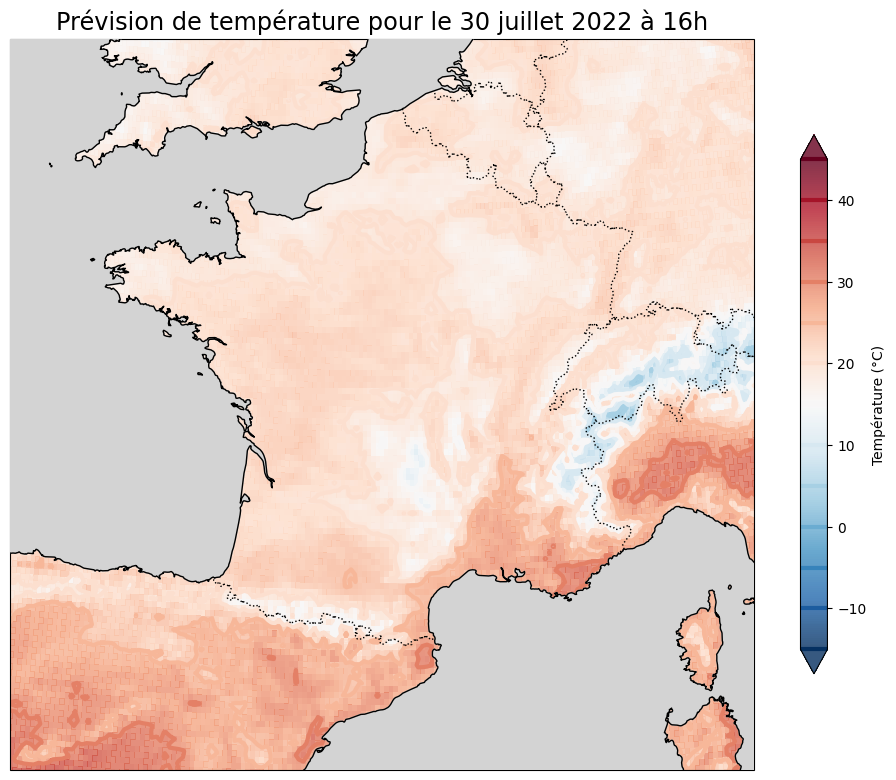

In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import rioxarray as rio

with rio.open_rasterio('temp.tiff') as temp:
    da_to_plot = temp.sel(band = 1, drop = True)

lat_min, lat_max = 40, 52
lon_min, lon_max = -6, 10
central_longitude = (lon_min + lon_max) / 2
central_latitude = (lat_min + lat_max) / 2

cmap = "RdBu_r"
milieu = 15
delta = 30

fig = plt.figure(figsize=(12,10), facecolor = 'w')
ax = plt.axes(projection = ccrs.LambertConformal(central_longitude = central_longitude,
                                                 central_latitude = central_latitude))
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

g = da_to_plot.plot(transform = ccrs.PlateCarree(),
                    cmap= cmap,
                    vmin = milieu - delta,
                    vmax = milieu + delta,
                    add_colorbar = False,
                    alpha = 0.8)

isothermes = [i for i in range (milieu - delta, milieu + delta + 5, 5)]
g2 = da_to_plot.plot.contour(transform = ccrs.PlateCarree(),
                cmap = cmap,
                add_colorbar = False,
                levels = isothermes,
                linewidths = 3)

cb = plt.colorbar(g,
                  label = "Température (°C)",
                  shrink = 0.7,
                  extend = 'both')
cb.add_lines(g2)

ax.coastlines(zorder = 101)
ax.add_feature(cfeature.BORDERS, zorder = 101, color = 'black', ls = ':')
ax.add_feature(cfeature.OCEAN, zorder = 99, color = 'lightgray')

ax.set_title("Prévision de température pour le 30 juillet 2022 à 16h",
            fontsize = "xx-large")

plt.show()


2025-07-28T06:00:00Z


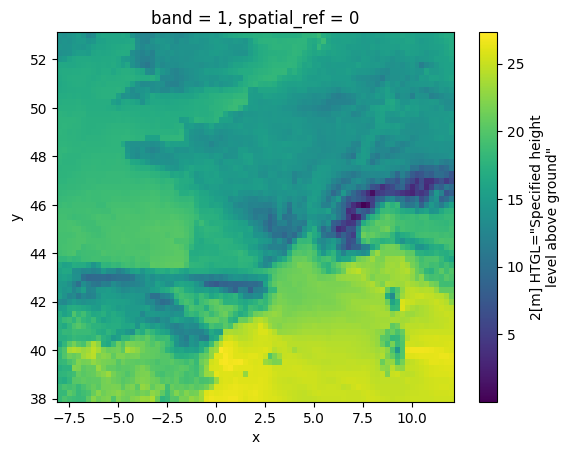

In [ ]:
from urllib import request
from bs4 import BeautifulSoup
import rioxarray as rio

with open('API_key.txt') as f:
    api_key = f.read()
    
ID = "TEMPERATURE__SPECIFIC_HEIGHT_LEVEL_ABOVE_GROUND"

ressource = "arpege/1.0/wms/MF-NWP-GLOBAL-ARPEGE-025-GLOBE-WMS/GetCapabilities?service=WMS"

url = f"https://public-api.meteofrance.fr/public/{ressource}&apikey={api_key}"

response = request.urlopen(url)
soup = BeautifulSoup(response.read())

ensemble_des_layers = soup.find_all("layer")

for layer in ensemble_des_layers:
    if layer.find("name").text == ID :
        break
    else:
        pass

previsions_disponibles = layer.find("dimension", {"name":"reference_time"}).text.split(",")

date_derniere_prevision = previsions_disponibles[-1]
print(date_derniere_prevision)
derniere_prevision = f"{ID}___{date_derniere_prevision}"

ressource = "/arpege/1.0/wcs/MF-NWP-GLOBAL-ARPEGE-025-GLOBE-WCS/DescribeCoverage?service=WCS"
url = f"https://public-api.meteofrance.fr/public{ressource}&coverageID={derniere_prevision}&apikey={api_key}"

response = request.urlopen(url)
soup = BeautifulSoup(response.read())
debut = soup.find('gml:beginposition').text
fin = soup.find('gml:endposition').text

ressource = "/arpege/1.0/wcs/MF-NWP-GLOBAL-ARPEGE-025-GLOBE-WCS/GetCoverage?SERVICE=WCS"
subset_time = date_derniere_prevision
subset_lat = "38,53"
subset_lon = "-8,12"

url = f"https://public-api.meteofrance.fr/public{ressource}&coverageId={derniere_prevision}&subset=time({subset_time})&subset=lat({subset_lat})&subset=long({subset_lon})&subset=height(2)&apikey={api_key}"

response = request.urlopen(url)
open('temp2.tiff', 'wb').write(response.read())

with rio.open_rasterio('temp2.tiff') as temp:
    temp.plot()

In [ ]:
from urllib import request
from bs4 import BeautifulSoup
import rioxarray as rio
import fastf1
from geopy.geocoders import Nominatim

session= fastf1.get_session(2025, 13, 'R')
session.load()

with open('API_key.txt') as f:
    api_key = f.read()
    
ID = "PRECIPITATION_TYPE_60_MIN__GROUND_OR_WATER_SURFACE"

ressource = "arpege/1.0/wms/MF-NWP-GLOBAL-ARPEGE-025-GLOBE-WMS/GetCapabilities?service=WMS"

url = f"https://public-api.meteofrance.fr/public/{ressource}&apikey={api_key}"

response = request.urlopen(url)
soup = BeautifulSoup(response.read())

ensemble_des_layers = soup.find_all("layer")

for layer in ensemble_des_layers:
    if layer.find("name").text == ID :
        break
    else:
        pass

previsions_disponibles = layer.find("dimension", {"name":"reference_time"}).text.split(",")

date_derniere_prevision = previsions_disponibles[-1]

derniere_prevision = f"{ID}___{date_derniere_prevision}"

ressource = "/arpege/1.0/wcs/MF-NWP-GLOBAL-ARPEGE-025-GLOBE-WCS/DescribeCoverage?service=WCS"
url = f"https://public-api.meteofrance.fr/public{ressource}&coverageID={derniere_prevision}&apikey={api_key}"

response = request.urlopen(url)
soup = BeautifulSoup(response.read())

req         WARNING 	DEFAULT CACHE ENABLED! (30.71 GB) /home/kurios/.cache/fastf1
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '16', '1', '63', '23', '44', '30', '5', '10', '87', '27', '22', '18', '31', '12', '14

In [ ]:
geolocator = Nominatim(user_agent="MyApp")

location = geolocator.geocode(session.event.Location)

print(session.event.Location)
print("The latitude is: ", round(location.latitude, 2))
print("The longitude is: ", round(location.longitude, 2))

Spa-Francorchamps
The latitude is:  34.63
The longitude is:  133.91


In [ ]:
debut = soup.find('gml:beginposition').text
fin = soup.find('gml:endposition').text
arg = soup.find('gml:axislabels').text
debut, fin, arg

('2025-07-28T13:00:00Z', '2025-07-30T12:00:00Z', 'long lat  time')

https://public-api.meteofrance.fr/public/arpege/1.0/wcs/MF-NWP-GLOBAL-ARPEGE-025-GLOBE-WCS/GetCoverage?SERVICE=WCS&coverageId=PRECIPITATION_TYPE_60_MIN__GROUND_OR_WATER_SURFACE___2025-07-28T12:00:00Z&subset=time(2025-07-28T13:00:00Z)&subset=lat(38,53)&subset=long(-8,12)&apikey=eyJ4NXQiOiJZV0kxTTJZNE1qWTNOemsyTkRZeU5XTTRPV014TXpjek1UVmhNbU14T1RSa09ETXlOVEE0Tnc9PSIsImtpZCI6ImdhdGV3YXlfY2VydGlmaWNhdGVfYWxpYXMiLCJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiJLdXJpaWlvc0BjYXJib24uc3VwZXIiLCJhcHBsaWNhdGlvbiI6eyJvd25lciI6Ikt1cmlpaW9zIiwidGllclF1b3RhVHlwZSI6bnVsbCwidGllciI6IlVubGltaXRlZCIsIm5hbWUiOiJEZWZhdWx0QXBwbGljYXRpb24iLCJpZCI6MzA1ODAsInV1aWQiOiJkNjkwZDU1Mi0wMzY1LTQwMWItOGE0OC1hYzkyOTdlYzhmOTUifSwiaXNzIjoiaHR0cHM6XC9cL3BvcnRhaWwtYXBpLm1ldGVvZnJhbmNlLmZyOjQ0M1wvb2F1dGgyXC90b2tlbiIsInRpZXJJbmZvIjp7IjUwUGVyTWluIjp7InRpZXJRdW90YVR5cGUiOiJyZXF1ZXN0Q291bnQiLCJncmFwaFFMTWF4Q29tcGxleGl0eSI6MCwiZ3JhcGhRTE1heERlcHRoIjowLCJzdG9wT25RdW90YVJlYWNoIjp0cnVlLCJzcGlrZUFycmVzdExpbWl0IjowLCJzcGlrZUFycmVzdFVua

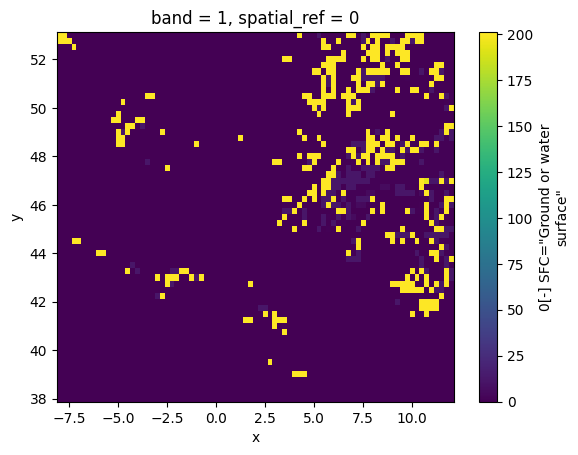

In [ ]:
ressource = "/arpege/1.0/wcs/MF-NWP-GLOBAL-ARPEGE-025-GLOBE-WCS/GetCoverage?SERVICE=WCS"
subset_time = debut
subset_lat = "38,53"
subset_long = "-8,12"
subset_height = "2"


url = f"https://public-api.meteofrance.fr/public{ressource}&coverageId={derniere_prevision}&subset=time({subset_time})&subset=lat({subset_lat})&subset=long({subset_long})&apikey={api_key}"
print(url)
response = request.urlopen(url)
open('temp2.tiff', 'wb').write(response.read())

with rio.open_rasterio('temp2.tiff') as temp:
    temp.plot()

/home/kurios/Documents/f1_analysis/f1_analysis_env/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


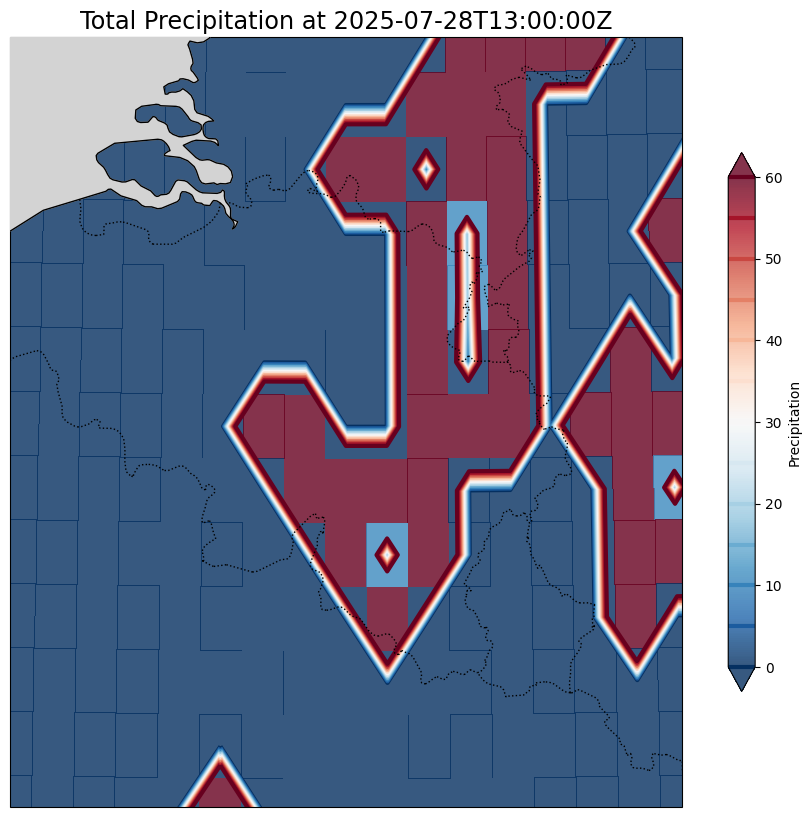

In [ ]:
with rio.open_rasterio('temp2.tiff') as temp:
    da_to_plot = temp.sel(band = 1, drop = True)

lat_min, lat_max = 49, 52
lon_min, lon_max = 3, 7
central_longitude = (lon_min + lon_max) / 2
central_latitude = (lat_min + lat_max) / 2

cmap = "RdBu_r"
milieu = 30
delta = 30

fig = plt.figure(figsize=(12,10), facecolor = 'w')
ax = plt.axes(projection = ccrs.LambertConformal(central_longitude = central_longitude,
                                                 central_latitude = central_latitude))
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

g = da_to_plot.plot(transform = ccrs.PlateCarree(),
                    cmap= cmap,
                    vmin = milieu - delta,
                    vmax = milieu + delta,
                    add_colorbar = False,
                    alpha = 0.8)

isothermes = [i for i in range (milieu - delta, milieu + delta + 5, 5)]
g2 = da_to_plot.plot.contour(transform = ccrs.PlateCarree(),
                cmap = cmap,
                add_colorbar = False,
                levels = isothermes,
                linewidths = 3)

cb = plt.colorbar(g,
                  label = "Precipitation",
                  shrink = 0.7,
                  extend = 'both')
cb.add_lines(g2)

ax.coastlines(zorder = 101)
ax.add_feature(cfeature.BORDERS, zorder = 101, color = 'black', ls = ':')
ax.add_feature(cfeature.OCEAN, zorder = 99, color = 'lightgray')

ax.set_title(f"Total Precipitation at {subset_time}",
            fontsize = "xx-large")

plt.show()
